## Setup

In [4]:
import pandas as pd
import numpy as np
import json
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set()

In [5]:
input_path = "/Users/Leonidas/Universität St.Gallen/STUD-Capstoneproject Tell 6 - General/02-Coding/01-Data/12_annotated_batches/batch1_all_f.jsonl"
path = r"/Users/Leonidas/Universität St.Gallen/STUD-Capstoneproject Tell 6 - General/"

In [8]:
# Initiate nlp model
disabled = ['parser', 'tagger', 'ner']
# nlp = spacy.load('de_core_news_lg', disable=disabled)
nlp = spacy.load('de_core_news_lg')
tokenize = spacy.load("/Users/Leonidas/Universität St.Gallen/STUD-Capstoneproject Tell 6 - General/02-Coding/03-Models/Custom Tokenizer/de_custom_v2")

OSError: [E053] Could not read config.cfg from /Users/leonidas/anaconda3/envs/ds-env/lib/python3.8/site-packages/de_core_news_lg/de_core_news_lg-2.3.0/config.cfg

## Exploratory Data Analysis

In [4]:
# Load data and seperate instructions at @ as defined
data = pd.read_csv(path+"/02-Coding/01-Data/01_instructions/instructions.csv", sep="@", encoding="utf-16", header=None, error_bad_lines=False)
print("Number of imported recipes: ",len(data))

Number of imported recipes:  12190


In [5]:
data.columns = ["text"]
data_dedup = data.drop_duplicates(subset='text', keep="first")

In [6]:
print("all recipes:",len(data))
print("unique recipes:",len(data_dedup))
print("removed duplicates:",len(data)-len(data_dedup))
data = data_dedup

all recipes: 12190
unique recipes: 4291
removed duplicates: 7899


In [7]:
# Name Instructions column
data.columns=["Instructions"]
# Create a column with tokenized instructions using spacy
data["Tokenized"] = data["Instructions"].apply(tokenize) 
data["NLP"] = data["Instructions"].apply(nlp) 

In [8]:
data.head()

,Instructions,Tokenized,NLP
0,Die Eier hart kochen. Dann pellen und mit eine...,"(Die, Eier, hart, kochen, ., Dann, pellen, und...","(Die, Eier, hart, kochen, ., Dann, pellen, und..."
1,Vorab folgende Bemerkung: Alle Mengen sind Cir...,"(Vorab, folgende, Bemerkung, :, Alle, Mengen, ...","(Vorab, folgende, Bemerkung, :, Alle, Mengen, ..."
2,"Die Kirschen abtropfen lassen, dabei den Saft ...","(Die, Kirschen, abtropfen, lassen, ,, dabei, d...","(Die, Kirschen, abtropfen, lassen, ,, dabei, d..."
3,"Den Spargel säubern, die holzigen Enden abschn...","(Den, Spargel, säubern, ,, die, holzigen, Ende...","(Den, Spargel, säubern, ,, die, holzigen, Ende..."
4,Kohlrabi schälen und klein würfeln. Mit der Br...,"(Kohlrabi, schälen, und, klein, würfeln, ., Mi...","(Kohlrabi, schälen, und, klein, würfeln, ., Mi..."


In [67]:
# doc = data["NLP"].iloc[0]

doc = []

for rec in data["NLP"]:
    for token in rec:
        doc.append(token)

# all tokens that arent stop words or punctuations
words = [token.text for token in doc if token.is_stop != True and token.is_punct != True and token.like_num == False]

# noun tokens that arent stop words or punctuations
nouns = [token.text for token in doc if token.is_stop != True and token.is_punct != True and token.pos_ == "NOUN"]
verbs = [token.text for token in doc if token.is_stop != True and token.is_punct != True and token.pos_ == "VERB"]

# Word Cats
word_freq = Counter(words)
noun_freq = Counter(nouns)
verb_freq = Counter(verbs)

# Commons
n = 20
common_words = pd.DataFrame(word_freq.most_common(n))
common_nouns = pd.DataFrame(noun_freq.most_common(n))
common_verbs = pd.DataFrame(verb_freq.most_common(n))

freqs = [common_words, common_verbs, common_nouns]

([<matplotlib.axis.XTick at 0x18223d9a0>,
 [Text(0, 0, 'lassen'),
  Text(0, 0, 'schneiden'),
  Text(0, 0, 'geben'),
  Text(0, 0, 'abschmecken'),
  Text(0, 0, 'anbraten'),
  Text(0, 0, 'würzen'),
  Text(0, 0, 'schälen'),
  Text(0, 0, 'waschen'),
  Text(0, 0, 'erhitzen'),
  Text(0, 0, 'dazugeben'),
  Text(0, 0, 'kochen'),
  Text(0, 0, 'servieren'),
  Text(0, 0, 'braten'),
  Text(0, 0, 'würfeln'),
  Text(0, 0, 'zugeben'),
  Text(0, 0, 'legen'),
  Text(0, 0, 'köcheln'),
  Text(0, 0, 'hacken'),
  Text(0, 0, 'garen'),
  Text(0, 0, 'putzen')])

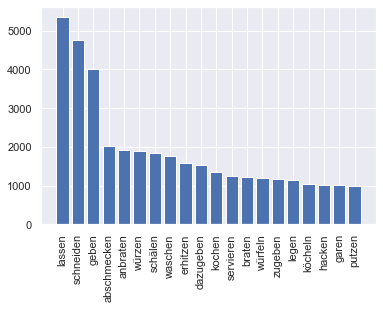

In [71]:
# Visualize Word frequency
cat = 1
plt.bar(x=range(n), height=freqs[cat][1], tick_label=freqs[cat][0])
plt.xticks(range(n), freqs[cat][0], rotation='vertical')

In [13]:
doc = data["NLP"].iloc[0]
for token in doc:
    print(token.text, token.tag_, token.pos_, token.is_punct, token.is_stop)

Die ART DET False True
Eier NN NOUN False False
hart ADJD ADJ False False
kochen VVINF VERB False False
. $. PUNCT True False
Dann ADV ADV False True
pellen VVFIN VERB False False
und KON CCONJ False True
mit APPR ADP False True
einem ART DET False True
Eierschneider NN NOUN False False
in APPR ADP False True
Scheiben NN NOUN False False
schneiden VVINF VERB False False
. $. PUNCT True False
Den ART DET False True
Reis NN NOUN False False
halbgar ADJD ADJ False False
kochen VVINF VERB False False
und KON CCONJ False True
zur APPRART ADP False True
Seite NN NOUN False False
stellen VVINF VERB False False
. $. PUNCT True False
Die ART DET False True
Wurst NN NOUN False False
( $( PUNCT True False
Kolbász NE PROPN False False
) $( PUNCT True False
in APPR ADP False True
dünne ADJA ADJ False False
Scheiben NN NOUN False False
schneiden VVINF VERB False False
. $. PUNCT True False
Den ART DET False True
Knoblauch NN NOUN False False
abziehen VVFIN VERB False False
und KON CCONJ False True
f

#### Length of Recipes

---------- METRICS ----------

Minimum Length of a Recipe:  10
Maximum Length of a Recipe:  868
Mean Length of a Recipe:  141
Standard Deviation of the Length of all Recipes:  71
Number of Recipes longer than 512 Tokens:  12

-----------------------------


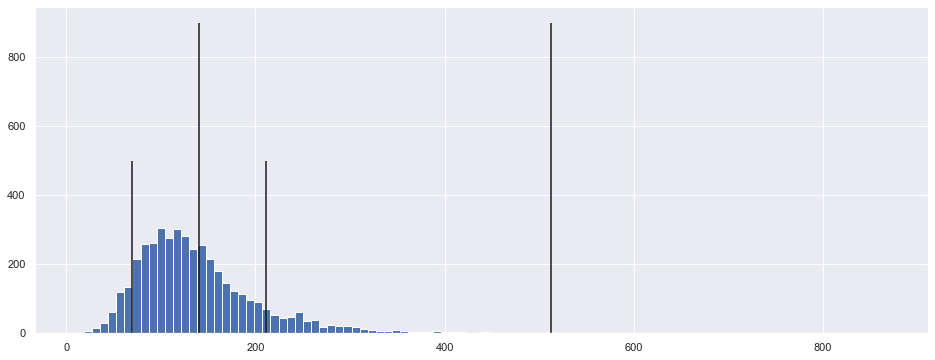

In [43]:
# Create a column with the amount of tokens per recipe
data["Length"] = data["Tokenized"].apply(len)
# Print some metrics about the length of the recipes
print("---------- METRICS ----------")
print("")
print("Minimum Length of a Recipe: ", min(data.Length))
print("Maximum Length of a Recipe: ", max(data.Length))
print("Mean Length of a Recipe: ", round(np.mean(data.Length)))
print("Standard Deviation of the Length of all Recipes: ", round(np.std(data.Length)))
print("Number of Recipes longer than 512 Tokens: ", len(data.Length[data["Length"]>512]))
print("")
print("-----------------------------")
# Init plot and increase figure size
plt.figure(figsize=(16, 6))
# Add histogram of recipe length in no. of tokens to the plot
plt.hist(data.Length, bins = 100)

# Mark important metrics with vertical lines
plt.vlines(512, label="Max size BERT", ymin= 0, ymax= 900)
plt.vlines(np.mean(data.Length), label="Mean Length", ymin= 0, ymax= 900)
plt.vlines(np.mean(data.Length)-np.std(data.Length), label="Mean Length", ymin= 0, ymax= 500)
plt.vlines(np.mean(data.Length)+np.std(data.Length), label="Mean Length", ymin= 0, ymax= 500)

# Save figure to 02-Coding --> 02-Plots --> chefkoch_recipe_length_hist.png before showing
# plt.savefig(path+"/02-Plots/chefkoch_recipe_length_hist.png")

In [20]:
class_labels = []
class_colors = []
rel_labels = []
rel_cols = []

In [21]:
with open(input_path, "r", encoding="utf8") as json_file:
    annotated_recipes = [json.loads(line) for line in json_file]

In [22]:
data = pd.DataFrame(annotated_recipes)
print("Rows:", data.shape[0])
print("Columns:", data.shape[1])

Rows: 199
Columns: 9


In [23]:
# nlp = spacy.load("/Users/Leonidas/Universität St.Gallen/STUD-Capstoneproject Tell 6 - General/02-Coding/03-Models/Custom Tokenizer/de_custom_v2")
# data["tokenized"] = data["text"].apply(nlp)
data = data.drop(['_input_hash', '_task_hash', "_session_id", "_view_id", "answer"], axis=1)
data["#words"] = data["text"].apply(lambda x: len(x.split()))
data["#tokens"] = data["tokens"].apply(lambda x: len(x))
data["#spans"] = data["spans"].apply(lambda x: len(x))
data["#relations"] = data["relations"].apply(lambda x: len(x))

In [24]:
data["#arg0"] = data["relations"].apply(lambda x: [x[i]["label"] for i in range(len(x))].count("ARG0"))
data["#arg1"] = data["relations"].apply(lambda x: [x[i]["label"] for i in range(len(x))].count("ARG1"))
data["#arg"] = data["relations"].apply(lambda x: [x[i]["label"] for i in range(len(x))].count("ARG"))

In [25]:
data["#Z"] = data["spans"].apply(lambda x: [x[i]["label"] for i in range(len(x))].count("Z"))
data["#V"] = data["spans"].apply(lambda x: [x[i]["label"] for i in range(len(x))].count("V"))
data["#T"] = data["spans"].apply(lambda x: [x[i]["label"] for i in range(len(x))].count("TOOL"))
data["#ZP"] = data["spans"].apply(lambda x: [x[i]["label"] for i in range(len(x))].count("ZEITP"))
data["#D"] = data["spans"].apply(lambda x: [x[i]["label"] for i in range(len(x))].count("DAUER"))
data["#A"] = data["spans"].apply(lambda x: [x[i]["label"] for i in range(len(x))].count("ATTR"))
data["#TP"] = data["spans"].apply(lambda x: [x[i]["label"] for i in range(len(x))].count("TEMP"))
data["#P"] = data["spans"].apply(lambda x: [x[i]["label"] for i in range(len(x))].count("PRÄP"))

## Annotated Data

In [26]:
stats = data.describe().round(2).drop(["count"], axis=0)

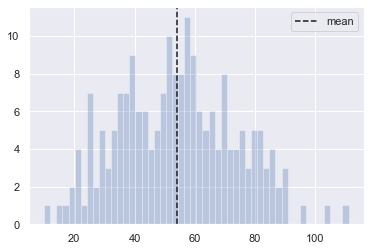

In [27]:
# plt.hist(x=data["#words"], bins=50, alpha = 0.3)
# plt.hist(x=data["#tokens"], bins=50, alpha = 0.3)
plt.hist(x=data["#spans"], bins=50, alpha = 0.3)
# for xc,label in zip(list(stats["#spans"]),list(stats.index)):
#     plt.axvline(x=xc, color='k', linestyle='--', label=label)
plt.axvline(x=stats["#spans"].iloc[0], color='k', linestyle='--', label="mean")
plt.legend()

<BarContainer object of 8 artists>

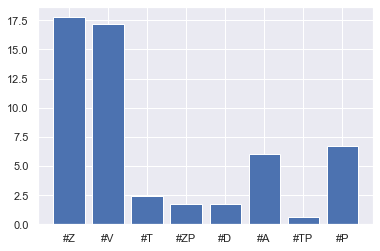

In [199]:
plt.bar(x=range(8), height=list(stats.iloc[0,7:]), tick_label=list(stats.columns)[7:])

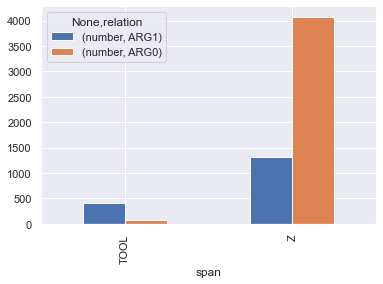

In [186]:
# stacked bar Graph with 1 bar = class split into args
combs = []
for rec_i in range(len(data)):
    for relation in data["relations"][rec_i]:
        combs.append((relation["child_span"]["label"], relation["label"]))
df = pd.DataFrame(combs, columns=["span", "relation"])
df["number"] = 1
df.groupby(["span", "relation"]).count().filter(items=[('TOOL', "ARG1"),('TOOL', "ARG0"),("Z", "ARG0"),("Z", "ARG1")], axis=0).unstack().plot(kind='bar', stacked=False)

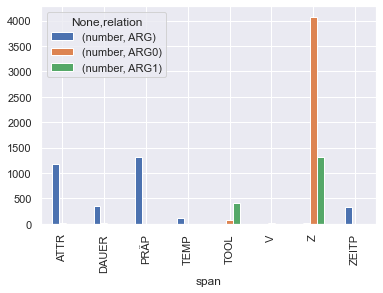

In [185]:
df.groupby(["span", "relation"]).count().unstack().plot(kind='bar', stacked=False)

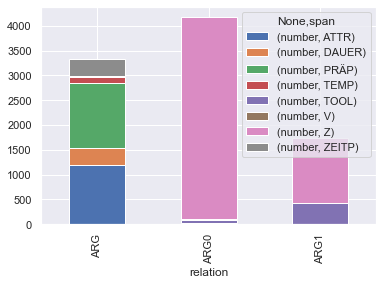

In [157]:
# stacked bar Graph with 1 bar = arg split into classes
df.groupby(["relation", "span"]).count().unstack().plot(kind='bar', stacked=True)

## Training Results

### NER

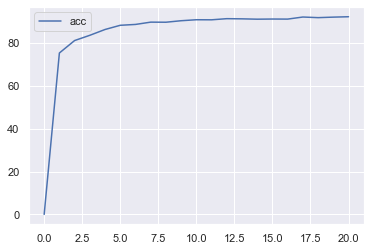

In [162]:
# Training Curve on Batch 1 NER
pd.DataFrame([("0%",0.00),("5%",75.35),("10%",81.16),("15%",83.61),("20%",86.32),("25%",88.28),("30%",88.68),("35%",89.75),("40%",89.71),("45%",90.41),("50%",90.87),("55%",90.84),("60%",91.37),("65%",91.29),("70%",91.13),("75%",91.20),("80%",91.17),("85%",92.14),("90%",91.85),("95%",92.09),("100%",92.27)], columns=["%set","acc"]).plot()


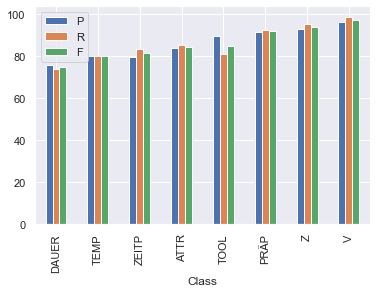

In [184]:
# F, P, R on Batch 1 NER
scores = pd.DataFrame([("PRÄP" ,91.697,92.701,92.196),
                       ("Z"    ,92.746,95.467,94.087),
                       ("TOOL" ,89.412,80.851,84.916),
                       ("ATTR" ,83.871,85.246,84.553),
                       ("ZEITP",79.518,83.544,81.481),
                       ("TEMP" ,80.000,80.000,80.000),
                       ("V"    ,96.144,98.811,97.459),
                       ("DAUER",75.610,73.810,74.699)],columns= ["Class","P","R","F"])
scores = scores.set_index(scores["Class"]).drop(["Class"], axis=1)
scores.sort_values(by="F").plot.bar()

### REL

In [ ]:
# Impact of max_length likee the train_curve plot